In [1]:
from manim import *

config.media_width = "75%"
config.verbosity = "WARNING"

ImportError: cannot import name 'Rotation' from 'scipy.spatial.transform' (unknown location)

In [3]:
CRANK_RADIUS = 0.2

MARP_BLUE = WHITE #rgb_to_color(hex_to_rgb("#77C8F6"))

OFFSET = np.array([-5, -2, 0])

TRANSFORM_COLOR = YELLOW_B

grid_dots = []
for x in range(-7, 8):
    for y in range(-4, 5):
        grid_dots.append(Dot(np.array([x, y, 0]), color=DARKER_GREY))
grid = Group(*grid_dots)

note_labels = {-2 : "A", -1 : "B", 0 : "C", 1  : "D", 2 : "E", 3 : "F", 4 : "G", 5 : "A", 6: "B"}

ax = Axes(
            x_range=[-2, 12, 1],
            y_range=[-2, 6, 1],
            x_length=14,
            y_length=8,
            tips=False,
            x_axis_config={"include_numbers": True},
            y_axis_config={"label_direction": 1.5*UP + LEFT}
        )

ax.get_y_axis().add_labels(note_labels)

num_ax = Axes(
            x_range=[-2, 12, 1],
            y_range=[-2, 6, 1],
            x_length=14,
            y_length=8,
            tips=False,
            axis_config={"include_numbers": True},
        )



#### Cranks

def create_crank(start, end, color = TRANSFORM_COLOR, crank_radius = CRANK_RADIUS) : 
    crank_dot = Dot(start, color = color)

    crank_len = np.linalg.norm(end - start)
    crank_line = Line(start, start + (end - start) * (crank_len - crank_radius) / crank_len)
    crank_line.color = color
    
    crank_arc = Arc(arc_center=end , angle=PI*5/4, start_angle= crank_line.get_angle()+ 3*PI/8, radius=crank_radius)
    crank_arc.color = color
    return VGroup(* [crank_dot,crank_line,crank_arc])


def unit_vector(vector):
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))

def change_crank(crank, start, end) : 
    old_vect = crank[1].get_vector()
    crank[0].move_to(start)
    crank_len = np.linalg.norm(end - start)
    crank[1].put_start_and_end_on(
        start,
        start + (end - start) * (crank_len - CRANK_RADIUS) / crank_len
    )
    new_vect = crank[1].get_vector()
    angle_diff = angle_between(old_vect,new_vect)
    crank[2].move_arc_center_to(end)
    crank[2].rotate(-angle_diff, about_point = end)


##### Cursors

def create_cursor(origin, color = TRANSFORM_COLOR):
    cursor_origin = Dot(origin, color = color)
    cursor_horizontal = Line(
        7 * LEFT + origin[1] * UP,
        7 * RIGHT + origin[1] * UP
    )
    cursor_horizontal.color = color
    cursor_vertical = Line(
        4 * DOWN + origin[0] * RIGHT,
        4 * UP + origin[0] * RIGHT
    )
    cursor_vertical.color = color
    return VGroup(*[cursor_origin,cursor_horizontal,cursor_vertical])

def shift_cursor(cursor, shifter) : 
    cursor[0].move_to(cursor[0].get_center() + shifter)
    cursor[1].put_start_and_end_on(
        cursor[1].start + UP * shifter[1],
        cursor[1].end + UP * shifter[1],
    )
    cursor[2].put_start_and_end_on(
        cursor[2].start + RIGHT * shifter[0],
        cursor[2].end + RIGHT * shifter[0],
    )



In [4]:
%%manim -qm -v ERROR --disable_caching ShowSpace

num_ax.stroke_color = WHITE
num_ax.get_x_axis().numbers.color = WHITE
num_ax.get_y_axis().color = WHITE
class ShowSpace(Scene):
    def construct(self):       
        self.add(grid)
        self.add(num_ax)
        
        comment = Tex('''Fixons un canevas 
        
sur lequel dessiner, ici $\mathbb{R}^2$.''').to_edge(UR)
        comment.color = MARP_BLUE
        comment.height = 0.8
        self.add(comment)
        self.play(Create(num_ax))
        self.pause(0.5)


In [5]:
%%manim -qm -v ERROR --disable_caching FirstCircle

circle = Circle(radius = 1, color = RED_B , fill_opacity = 0.2)
cursor = create_cursor(OFFSET)

class FirstCircle(Scene):
    def construct(self):
        self.add(grid)
        self.add(num_ax)
        
        comment = Tex('''Dessinons un cercle
        
sur un calque transparent

placé par dessus notre canevas''').to_edge(UR)
        comment.color = MARP_BLUE
        comment.height = 1.3
        self.add(comment)
        
        self.pause(0.5)
        num_ax.generate_target()
        num_ax.target.stroke_color = DARK_GREY
        num_ax.target.get_x_axis().numbers.color = DARK_GREY
        num_ax.target.get_y_axis().color = DARK_GREY
        self.play(MoveToTarget(num_ax))
        self.pause(1)
        
        self.add(cursor)
        self.play(Create(cursor))

        
        circle.move_to(OFFSET + UR)
        self.add(circle)
        self.play(Create(circle))

        




In [6]:
%%manim -qm -v ERROR --disable_caching FirstTransform

class FirstTransform(Scene):
    def construct(self):
        self.add(grid)
        self.add(num_ax)
        comment = Tex('''On peut déplacer notre calque 

avant de dessiner

Ici $(x,y) \mapsto (x + 2, y + 2)$''').to_edge(UR)
        comment.color = MARP_BLUE
        comment.height = 1.3
        self.add(comment)

        cursor = create_cursor(OFFSET)
        self.add(cursor)
        
        crank = create_crank(OFFSET, OFFSET + 2*UR)
        
        self.add(crank)
        self.play(Create(crank))
        
        cursor.generate_target()
        shift_cursor(cursor.target, 2*UR)
        self.play(MoveToTarget(cursor))

        circle2 = circle.copy()
        circle2.shift(2*UR)
        self.add(circle2)
        self.play(Create(circle2))


In [7]:
%%manim -qm -v ERROR --disable_caching WholeDrawing

class WholeDrawing(Scene):
    def construct(self):
        self.add(grid)
        self.add(num_ax)
        comment = Tex('''On dessine en deux étapes : 
        
1) Dessin d'un motif

2) Transformation du calque''').to_edge(UR)
        comment.color = MARP_BLUE
        comment.height = 1.3
        self.add(comment)

        cursor = create_cursor(OFFSET)
        self.add(cursor)

        circle.move_to(OFFSET + UR)
        self.add(circle)
        self.play(Create(circle))

        crank = create_crank(OFFSET, OFFSET + 2*UR)
        self.add(crank)
        self.play(Create(crank))
        

        
        cursor.generate_target()
        shift_cursor(cursor.target, 2*UR)
        self.play(MoveToTarget(cursor))

        circle2 = circle.copy()
        circle2.shift(2*UR)
        self.add(circle2)
        self.play(Create(circle2))

        
        
        crank2 = create_crank(OFFSET + 2 * UR, OFFSET + 4 * RIGHT)
        self.play(FadeOut(crank),Create(crank2))

        cursor2 = create_cursor(OFFSET + 2 * UR)
        self.add(cursor2)
        self.remove(cursor)

        cursor2.generate_target()
        shift_cursor(cursor2.target, 2*DR)
        self.play(MoveToTarget(cursor2))


        circle3 = circle2.copy()
        circle3.shift(2*DR)
        self.add(circle3)
        self.play(Create(circle3))

        crank3 = create_crank(OFFSET + 4 *RIGHT , OFFSET + 4 * RIGHT + 2*UR)
        self.play(FadeOut(crank2),Create(crank3))

        
        cursor3 = create_cursor(OFFSET + 4 * RIGHT)
        self.add(cursor3)
        self.remove(cursor2)

        cursor3.generate_target()
        shift_cursor(cursor3.target, 2*UR)
        self.play(MoveToTarget(cursor3))


        self.play(MoveToTarget(cursor3))

        circle4 = circle.copy()
        circle4.shift(4 * RIGHT + 2*UR)
        self.add(circle4)
        self.play(Create(circle4))

        self.play(FadeOut(cursor3), FadeOut(crank3))

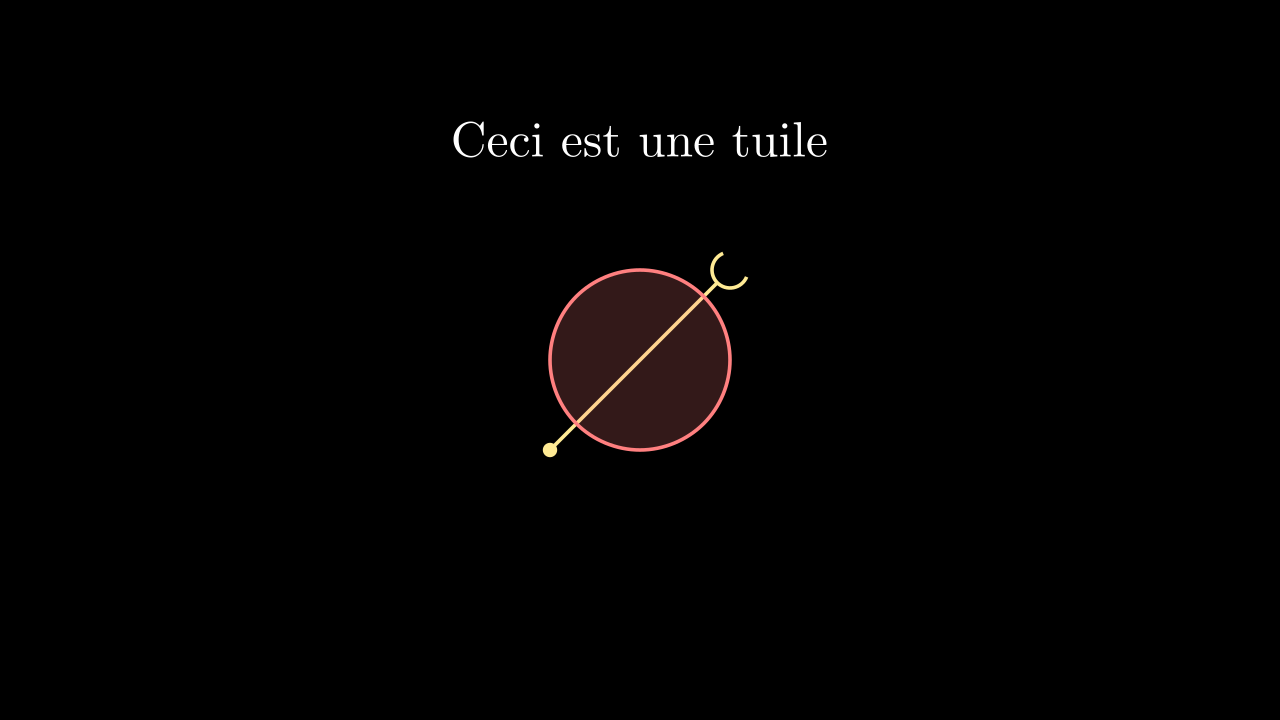

In [8]:
%%manim -qm -v ERROR --disable_caching FirstTile

circle = Circle(radius = 1, color = RED_B , fill_opacity = 0.2)

class FirstTile(Scene):
    def construct(self):
        
        crank = create_crank(DL, UR)
        self.add(crank)
        
        circle.move_to(ORIGIN)
        self.add(circle)

        comment = Tex('''Ceci est une tuile''')#.to_edge(UR)
        comment.height = 0.4
        comment.next_to(circle,direction = 5*UP)
        self.add(comment)
        


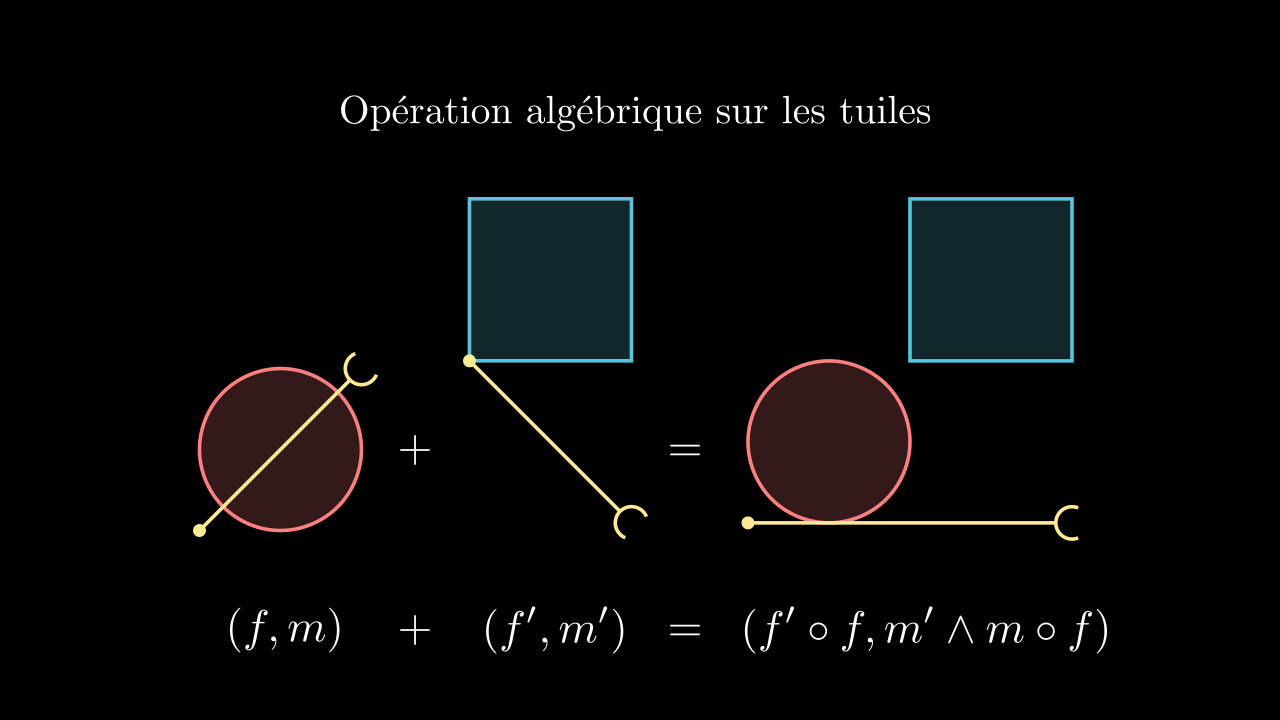

In [9]:
%%manim -qm -v ERROR --disable_caching TileAlgebra

class TileAlgebra(Scene):
    def construct(self):
        
        circle = Circle(radius = 1., color = RED_B , fill_opacity = 0.2)
        square = Square( color = BLUE_C, fill_opacity = 0.2)

        result = VGroup(*[
            circle.copy(), 
            square.copy().shift(2*UR),
            create_crank(DL, 3* RIGHT + DOWN)])
        result.scale(0.9)

        crank_circle = create_crank(DL, UR)
        circle.move_to(ORIGIN)
        circle_tile = VGroup(*[circle,crank_circle])
        circle_tile.scale(0.9)

        plus = MathTex("+")

        
        crank_square = create_crank(UL, DR)
        square.move_to(ORIGIN + 2*UP)
        square_tile = VGroup(*[square,crank_square])
        square_tile.scale(0.9)

        equals = MathTex("=")

        circle_tile.shift(LEFT * 4)
        plus.shift(LEFT * 2.5)
        square_tile.shift(LEFT * 1)
        equals.shift(RIGHT * 0.5)
        result.shift(RIGHT * 2)
        
        operation = VGroup(*[
            circle_tile,
            plus,
            square_tile,
            equals,
            result])
        operation.shift(DOWN)
        self.add(operation)

        comment = Tex('''Opération algébrique sur les tuiles''')#.to_edge(UR)
        comment.height = 0.4
        comment.next_to(operation,direction = 3*UP)
        self.add(comment)

        semigroup = MathTex("(f,m)", "+" , "(f',m')", "=" , "(f'\circ f, m' \wedge m \circ f)")

        for i in range(len(semigroup)) :
            semigroup[i].move_to(np.array([operation[i].get_center()[0], -1, 0]))
        semigroup[-1].next_to(semigroup[-2], direction = RIGHT * 2)
        semigroup.shift(DOWN * 2)
        self.add(semigroup)

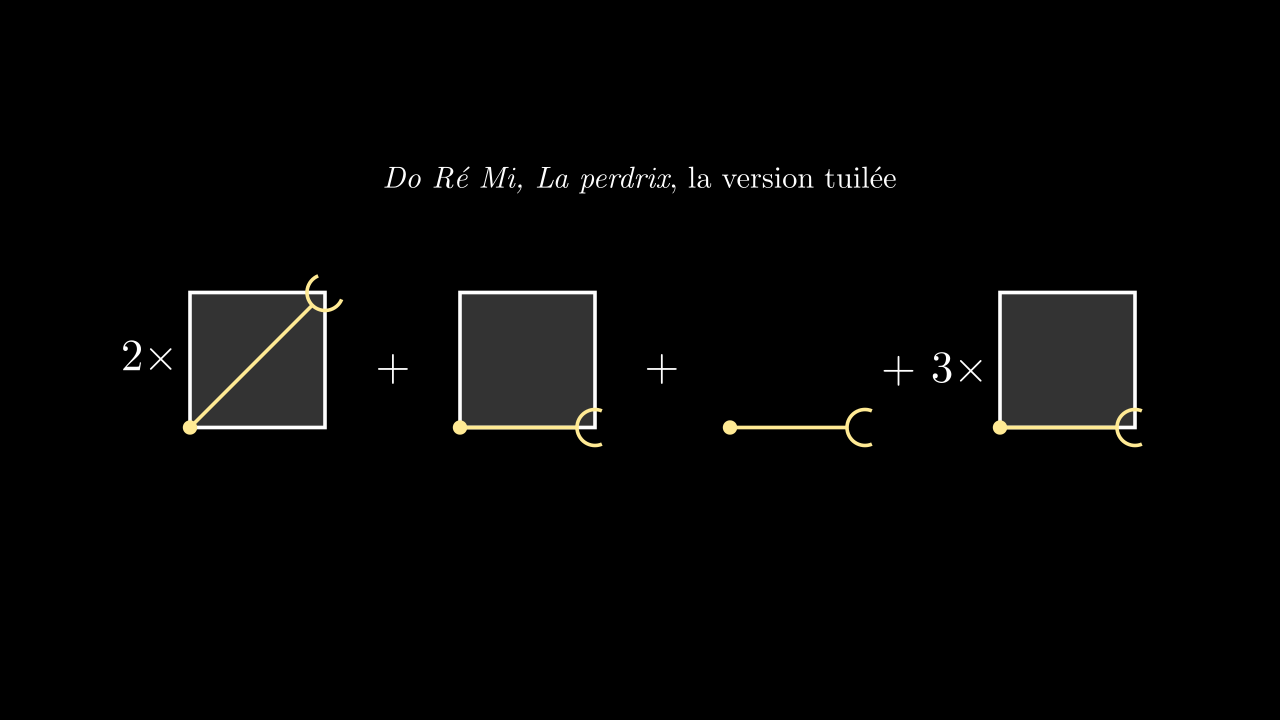

In [39]:
%%manim -qm -v ERROR --disable_caching DoremiAlgebra

SIZE_TILE = 1.5

sq = Square( fill_opacity = 0.2, side_length = SIZE_TILE)
sq.shift(RIGHT * SIZE_TILE /2)
crankup = create_crank(DOWN *SIZE_TILE /2, UR * SIZE_TILE +DOWN *SIZE_TILE /2 )
crankright = create_crank(DOWN *SIZE_TILE /2, DOWN *SIZE_TILE /2 + RIGHT * SIZE_TILE)

tileup = VGroup(*[sq,crankup])
tileright = VGroup(*[sq.copy(),crankright.copy()])
silence = crankright


plus = MathTex("+")

class DoremiAlgebra(Scene):
    def construct(self):
        tileup.shift(5*LEFT)
        self.add(tileup)
        self.add(MathTex("2 \\times ").next_to(tileup,LEFT * 0.5))
        tileright.shift(2*LEFT)
        self.add(tileright)
        self.add(MathTex("+").next_to(tileright,2* LEFT))
        self.add(MathTex("+").next_to(tileright,2* RIGHT))
        silence.shift(RIGHT)
        self.add(silence)
        right2 = tileright.copy()
        right2.shift(RIGHT *6)
        self.add(right2)
        self.add(MathTex("+ ~3\\times").next_to(right2,LEFT * 0.5))

        comment = Tex('''\emph{Do Ré Mi, La perdrix}, la version tuilée''')#.to_edge(UR)
        comment.height = 0.3
        comment.shift(2*UP)
        self.add(comment)

        """ circle = Circle(radius = 1., color = RED_B , fill_opacity = 0.2)
        square = Square( color = BLUE_C, fill_opacity = 0.2)

        result = VGroup(*[
            circle.copy(), 
            square.copy().shift(2*UR),
            create_crank(DL, 3* RIGHT + DOWN)])
        result.scale(0.9)

        crank_circle = create_crank(DL, UR)
        circle.move_to(ORIGIN)
        circle_tile = VGroup(*[circle,crank_circle])
        circle_tile.scale(0.9)

        plus = MathTex("+")

        
        crank_square = create_crank(UL, DR)
        square.move_to(ORIGIN + 2*UP)
        square_tile = VGroup(*[square,crank_square])
        square_tile.scale(0.9)

        equals = MathTex("=")

        circle_tile.shift(LEFT * 4)
        plus.shift(LEFT * 2.5)
        square_tile.shift(LEFT * 1)
        equals.shift(RIGHT * 0.5)
        result.shift(RIGHT * 2)
        
        operation = VGroup(*[
            circle_tile,
            plus,
            square_tile,
            equals,
            result])
        operation.shift(DOWN)
        self.add(operation)

        comment = Tex('''\emph{Do Ré Mi, La perdrix}, la version tuilée''')#.to_edge(UR)
        comment.height = 0.4
        comment.next_to(operation,direction = 3*UP)
        self.add(comment)

        semigroup = MathTex("(f,m)", "+" , "(f',m')", "=" , "(f'\circ f, m' \wedge m \circ f)")

        for i in range(len(semigroup)) :
            semigroup[i].move_to(np.array([operation[i].get_center()[0], -1, 0]))
        semigroup[-1].next_to(semigroup[-2], direction = RIGHT * 2)
        semigroup.shift(DOWN * 2)
        self.add(semigroup) """